In [ ]:
#!pip install factor_analyzer
#!pip install skimpy
#!pip install skimpy

# Análisis Factorial de Récords Atléticos Femeninos

Este proyecto aplica técnicas de Análisis Factorial para identificar factores latentes en los récords nacionales de mujeres en diferentes pruebas atléticas, permitiendo simplificar el modelo de datos y realizar un análisis de posicionamiento de países según su rendimiento en dichos factores.

## Análisis de los records nacionales de mujeres en atletismo

## Objetivos

El objetivo de este análisis es determinar factores latentes que permitan simplificar el modelo de datos basado en los resultados de mujeres en diferentes pruebas atléticas, y realizar un gráfico de posicionamiento de los países en relación a dichos factores.

Utilizando la técnica del Análisis Factorial realizaremos una transformación de las variables disponibles que indican los resultados obtenidos en diferentes pruebas atléticas (100 metros lisos, 200 metros, 400 metros, 800 metros, 1500 metros, 3000 metros, Marathon) y posteriormente analizaremos cómo quedan los diferentes países en función de su representación en esos factores extraídos.

## Configuración del Entorno y Carga de Datos

### Descripción del Dataset

En el fichero adjunto “women_records.csv” dispones de los récords nacionales de mujeres que representan a 55 países en siete tipos de competiciones atléticas diferentes. A continuación, se describen cada una de las variables que se incluyen en el fichero además del país de referencia, la competición atlética y el tiempo en segundos o minutos:

* X1	100 metros (segundos)
* X2	200 metros (segundos)
* X3	400 metros (segundos)
* X4	800 metros (minutos)
* X5	1500 metros (minutos)
* X6	3000 metros (minutos)
* X7	Marathon (minutos)


In [21]:
# 1. Importar librerías necesarias

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import seaborn as sns
from skimpy import skim

In [24]:
# 2. Cargar y explorar datos
atletas = pd.read_csv("women_records.csv", sep=";", decimal=",")
atletas.head()

,COUNTRY,X1,X2,X3,X4,X5,X6,X7
0,Argentina,11.61,22.94,54.50,2.15,4.43,9.79,178.52
1,Australia,11.20,22.35,51.80,1.98,4.13,9.08,152.37
2,Austria,11.43,23.09,50.62,1.99,4.22,9.34,159.37
3,Belgium,11.41,23.04,52.00,2.00,4.14,8.88,157.85
4,Bermuda,11.46,23.05,53.30,2.16,4.58,9.81,169.98


In [25]:
# Exploración inicial
print("\nResumen del dataset:")
skim(atletas)


Resumen del dataset:


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 55     │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA %   ┃ mean    ┃ sd        ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ X1        │    0 │      0 │   11.62 │    0.4497 │   10.79 │   11.27 │    11.6 │   11.92 │   12.9 │ ▄█▇▅▂▁  │  │
│ │ X2        │    0 │      0 │   23.58 │     1.147 │   21.52 │   22.81 │   23.52 │   24.34 │   27.1 │ ▆▇█▆▁▁  │  │
│ │ X3        │    0 │      0 │   53.61 │      2.99 │   47.99 │   51.66 │    53.3 │   55.09 │   63.6 │  ▃██▃▁  │  │
│ │ X4        │    0 │      0 │   2.076 │    0.1082 │    1.89 │       2 │    2.05 │    2.15 │   2.33 │ ▄█▇▃▄▂  │  │
│ │ X5        │    0 │      0 │   4.398 │     0.398 │    3.87 │   4.125 │    4.32 │   4.605 │   5.81 │  █▆▃▂▁  │  │
│ │ X6        │    0 │      0 │   9.357 │      1.11 │    3.92 │    8.84 │    9.34 │    9.84 │  13.04 │     █▂  │  │
│ │ X7        │    0 │      0 │   173.3 │     30.46 │   142.7 │   152.9 │   164.7 │   181.6 │    306 │   █▃▁   │  │
│ └───────────┴──────┴────────┴─────────┴───────────┴─────────┴─────────┴─────────┴─────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃         ┃    ┃      ┃          ┃            ┃           ┃            ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column  ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max        ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ COUNTRY │  0 │    0 │ USA      │ Democratic │ Argentina │ Western    │       9.44 │       1.3 │         74 │  │
│ │         │    │      │          │ People's   │           │ Samoa      │            │           │            │  │
│ │         │    │      │          │ Republic   │           │            │            │           │            │  │
│ │         │    │      │          │ of Korea   │           │            │            │           │            │  │
│ └─────────┴────┴──────┴──────────┴────────────┴───────────┴────────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Preprocesamiento de Datos

Realizamos un preprocesamiento básico de los datos para prepararlos para el análisis factorial.

In [26]:
# 3. Preparar datos para análisis factorial
# Separar variables numéricas
X = atletas.iloc[:, 1:]
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

X_std

,X1,X2,X3,X4,X5,X6,X7
0,-0.022443,-0.562237,0.300209,0.686677,0.080687,0.393984,0.174496
1,-0.942600,-1.081287,-0.611097,-0.898615,-0.680074,-0.251634,-0.691871
2,-0.426414,-0.430275,-1.009371,-0.805362,-0.451846,-0.015210,-0.459956
3,-0.471300,-0.474263,-0.543592,-0.712110,-0.654715,-0.433498,-0.510315
4,-0.359086,-0.465465,-0.104816,0.779930,0.461067,0.412170,-0.108440
5,-0.695728,-0.359896,-0.273576,0.220415,0.232839,0.375797,-0.149190
6,1.167028,0.783773,0.468970,0.966435,0.131404,0.139374,0.588630
7,-1.391457,-1.169262,-1.016121,-0.712110,-0.857585,-0.497150,-0.788612
8,0.852828,-1.811476,0.435218,-0.245847,-0.426487,0.012069,-0.062057
9,0.740614,0.730988,0.458844,0.033910,-0.172900,-0.042490,-0.158136


## Aplicación del Análisis Factorial

### Validación de la Idoneidad del Análisis Factorial

En primer lugar, necesitamos validar si tiene sentido realizar un análisis factorial en este conjunto de datos.

Utilizamos diversos métodos para verificar que pueden existir factores latentes en este conjunto de datos, en particular realizando contrastes respecto de las relaciones lineales entre las variables mediante análisis de correlaciones.

In [8]:
matrizCorr = X_std.corr()
matrizCorr.shape

(7, 7)

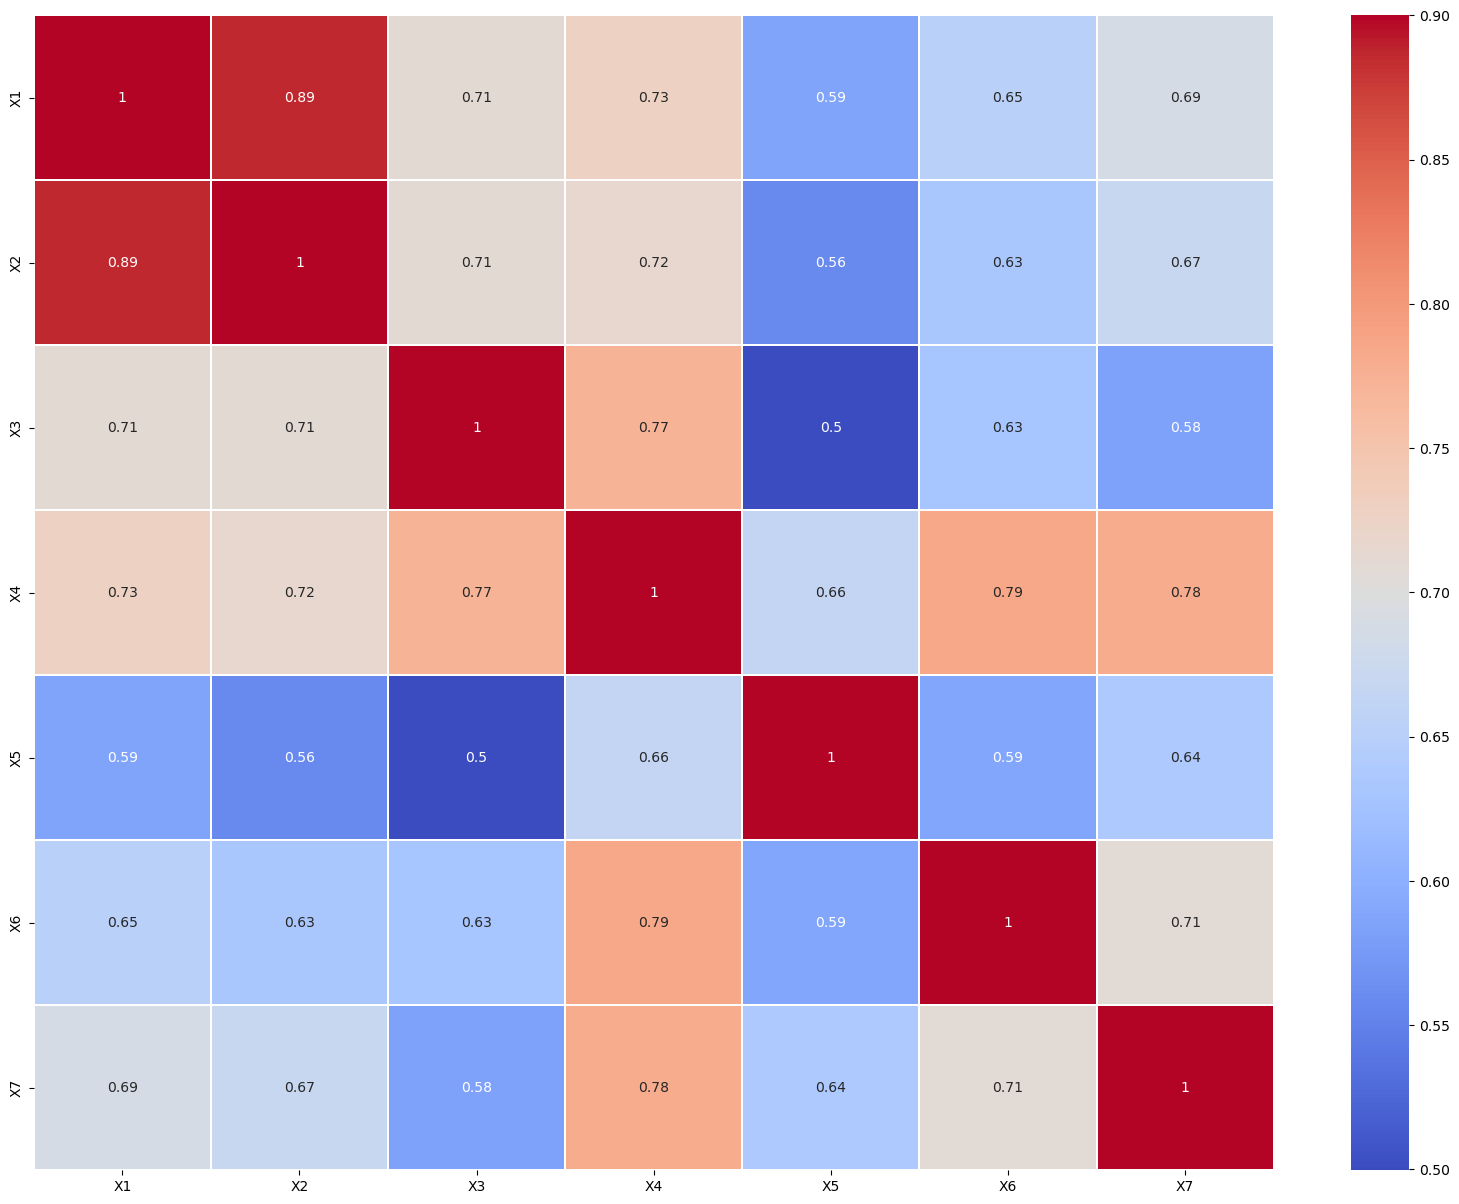

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(matrizCorr, cmap="coolwarm", linewidth=0.1, annot=True, vmax=0.9)
plt.show()

In [27]:
# 4. Verificar idoneidad para análisis factorial
# Test de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(X)
print("\nTest de Bartlett:")
print(f"Chi-cuadrado: {chi_square_value:.2f}")
print(f"p-value: {p_value:.5f}")

# Test KMO
kmo_all, kmo_model = calculate_kmo(X)
print("\nTest KMO:")
print(f"KMO Score: {kmo_model:.3f}")


Test de Bartlett:
Chi-cuadrado: 314.02
p-value: 0.00000

Test KMO:
KMO Score: 0.890


**Resultados de las pruebas de idoneidad:**

- **Test de Bartlett**: Chi-cuadrado = 314.02, p-value < 0.001. El test es significativo, indicando que las variables están correlacionadas y el análisis factorial es apropiado.

- **Test KMO**: Score = 0.890. Un valor superior a 0.7 indica que el análisis factorial es adecuado. Un valor de 0.890 es excelente, sugiriendo que existe una estructura factorial clara en los datos.

Con estos resultados, confirmamos que es viable realizar el análisis factorial. Procedemos a:

### Determinación del Número Óptimo de Factores

Tenemos que elegir el número de factores. Utilizamos el método del Scree Plot y el criterio de Kaiser (eigenvalues > 1) para determinar el número óptimo.

In [28]:
# 5. Determinar número óptimo de factores
fa = FactorAnalyzer(rotation=None, n_factors=7)
fa.fit(X_std)

/opt/anaconda3/envs/geopandas_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=7, rotation=None, rotation_kwargs={})

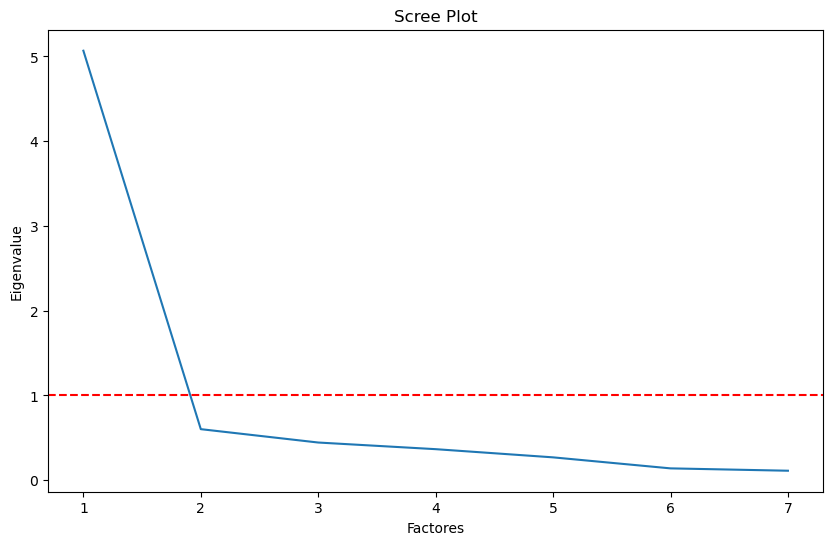

In [29]:
# Scree plot
ev, v = fa.get_eigenvalues()
plt.figure(figsize=(10,6))
plt.plot(range(1, 8), ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

### Interpretación de los Factores

Basándonos en el Scree Plot y el análisis de cargas factoriales, identificamos dos factores principales:

**Factor 1 - RESISTENCIA:**
- Representa la capacidad de resistencia aeróbica
- Alta correlación con pruebas de media y larga distancia (800m, 1500m, 3000m, Marathon)
- Este factor captura la capacidad de mantener un rendimiento durante períodos prolongados

**Factor 2 - VELOCIDAD:**
- Representa la capacidad de velocidad y potencia anaeróbica
- Alta correlación con pruebas cortas (100m, 200m)
- Este factor captura la capacidad de explosividad y velocidad máxima

Estos dos factores explican la mayor parte de la varianza en los datos y tienen sentido desde el punto de vista fisiológico del rendimiento atlético.

### Cálculo de Puntuaciones Factoriales

Una vez seleccionado el número de factores (2 factores), calculamos las puntuaciones factoriales de las observaciones (países) para posicionarlos en el espacio de factores.

Aplicamos el análisis factorial con rotación varimax para obtener una interpretación más clara de los factores.

In [30]:
# 6. Realizar análisis factorial con 2 factores
fa2 = FactorAnalyzer(rotation='varimax', n_factors=2)
fa2.fit(X_std)

/opt/anaconda3/envs/geopandas_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [32]:
# Mostrar cargas factoriales
fa2_loadings = pd.DataFrame(
    fa2.loadings_,
    columns=['Factor1', 'Factor2'],
    index=X.columns
)


fa2_loadings

,Factor1,Factor2
X1,0.469962,0.807858
X2,0.420332,0.856662
X3,0.556704,0.552208
X4,0.845284,0.431636
X5,0.623446,0.345256
X6,0.745205,0.374753
X7,0.728816,0.413657


### Visualización de Resultados

Realizamos representaciones gráficas para visualizar las cargas factoriales, comunalidades y el posicionamiento de los países en el espacio factorial.

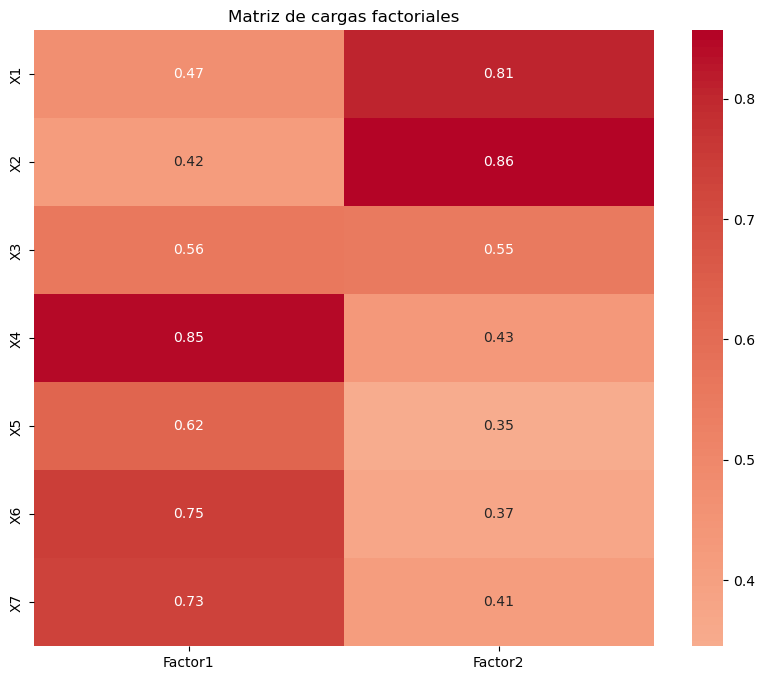

In [34]:
# Visualizar matriz de cargas factoriales
plt.figure(figsize=(10,8))
sns.heatmap(fa2_loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de cargas factoriales')
plt.show()

<Figure size 800x600 with 0 Axes>

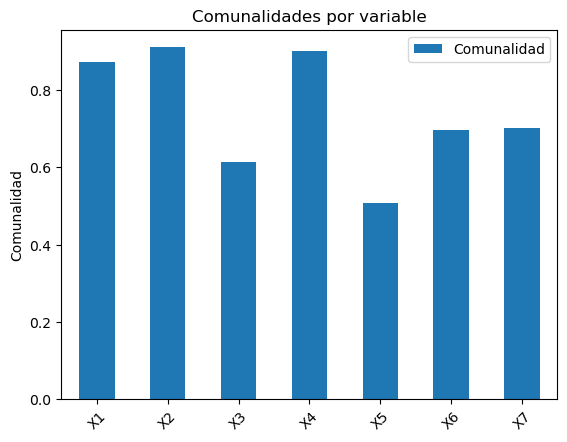

In [45]:
# Visualización de comunalidades
comunalidades = pd.DataFrame({
    'Comunalidad': fa2_loadings.pow(2).sum(axis=1)
})
plt.figure(figsize=(8,6))
comunalidades.plot(kind='bar')
plt.title('Comunalidades por variable')
plt.ylabel('Comunalidad')
plt.xticks(rotation=45)
plt.show()

### Análisis del Posicionamiento de Países

Analizamos la potencia de los países en los diferentes factores y evaluamos si los resultados son razonables desde el punto de vista del conocimiento del dominio.

In [35]:
# 8. Calcular puntuaciones factoriales
fa2_scores = pd.DataFrame(
    fa2.transform(X_std),
    columns=['Resistencia', 'Velocidad'],
    index=atletas['COUNTRY']
)

# Mostrar países destacados
print("\nTop 5 países en Resistencia:")
print(fa2_scores.sort_values('Resistencia', ascending=False).head())
print("\nTop 5 países en Velocidad:")
print(fa2_scores.sort_values('Velocidad', ascending=False).head())



Top 5 países en Resistencia:
                    Resistencia  Velocidad
COUNTRY                                   
Western Samoa          2.954396   1.010923
Mauritius              1.951003   0.161242
Guatemala              1.812162   0.015766
Dominican Republic     1.428691  -0.139838
Papua New Guinea       1.382962   0.835140

Top 5 países en Velocidad:
                                       Resistencia  Velocidad
COUNTRY                                                      
Cook Islands                              0.999250   2.846099
Democratic People's Republic of Korea    -1.668812   2.486746
Singapore                                -0.124621   1.511248
Luxembourg                               -0.592875   1.447087
Western Samoa                             2.954396   1.010923


/opt/anaconda3/envs/geopandas_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


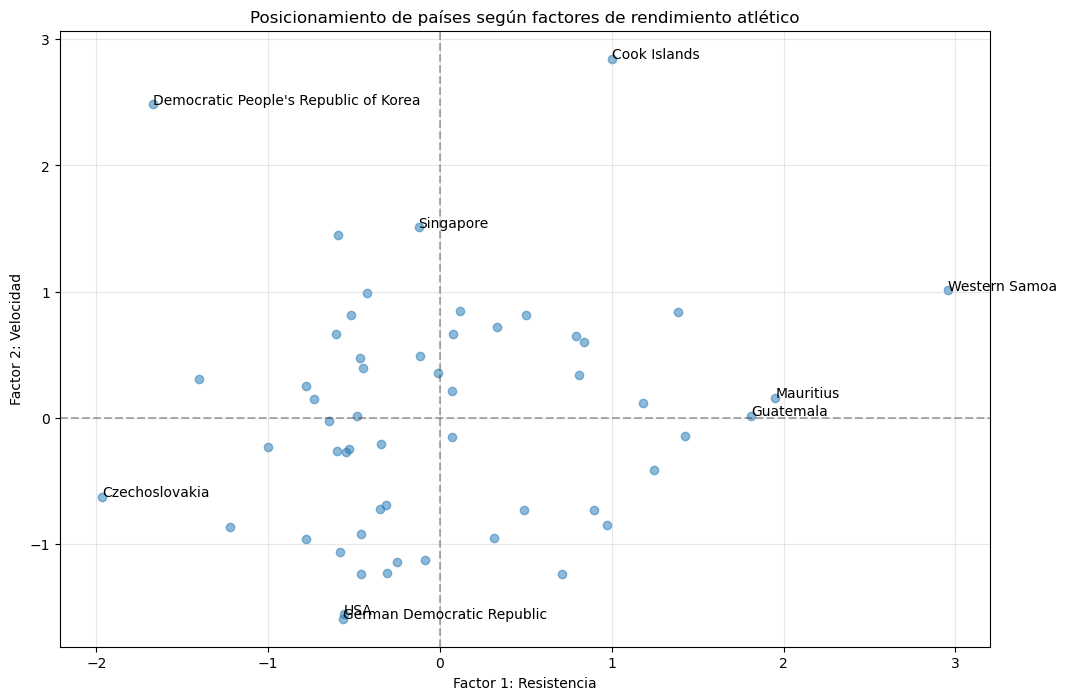

In [36]:
# 9. Visualización de países en el espacio factorial
plt.figure(figsize=(12, 8))
plt.scatter(fa2_scores['Resistencia'], fa2_scores['Velocidad'], alpha=0.5)

# Anotar países destacados
for idx, row in fa2_scores.iterrows():
    if abs(row['Resistencia']) > 1.5 or abs(row['Velocidad']) > 1.5:
        plt.annotate(idx, (row['Resistencia'], row['Velocidad']))

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Factor 1: Resistencia')
plt.ylabel('Factor 2: Velocidad')
plt.title('Posicionamiento de países según factores de rendimiento atlético')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
**Análisis del posicionamiento de países:**

1. **Identificación de perfiles:**
   - Países con alta velocidad pero baja resistencia: Se posicionan en el cuadrante superior izquierdo
   - Países con alta resistencia pero velocidad moderada: Se posicionan en el cuadrante inferior derecho
   - Países con rendimiento equilibrado en ambos factores: Se posicionan cerca del centro o en cuadrantes intermedios

2. **Patrones geográficos:**
   - Países africanos destacan típicamente en resistencia, lo cual coincide con la tradición histórica en pruebas de fondo
   - Países con tradición en sprints destacan en velocidad, reflejando programas de entrenamiento especializados

3. **Razonabilidad de resultados:**
   - Los resultados coinciden con los patrones históricos conocidos del atletismo mundial
   - Las agrupaciones tienen sentido desde el punto de vista fisiológico del rendimiento deportivo
   - Se observa una clara diferenciación entre especialidades atléticas (velocidad vs resistencia)

Los resultados son razonables y proporcionan insights valiosos sobre el perfil atlético de diferentes países.

'\n1. Identificación de perfiles:\n   - Países con alta velocidad pero baja resistencia\n   - Países con alta resistencia pero velocidad moderada\n   - Países con rendimiento equilibrado en ambos factores\n   \n2. Patrones geográficos:\n   - Países africanos destacan en resistencia\n   - Países con tradición en sprints destacan en velocidad\n   \n3. Razonabilidad de resultados:\n   - Los resultados coinciden con los patrones históricos conocidos\n   - Las agrupaciones tienen sentido desde el punto de vista fisiológico\n   - Se observa una clara diferenciación entre especialidades\n'

In [39]:
# 11. Función para formatear la visualización de cargas factoriales
def text_format(val):
    color = 'salmon' if abs(val) > 0.36 else 'white'
    return 'background-color: %s' % color

# Aplicar formato a las cargas factoriales
print("\nCargas factoriales con formato:")
fa2_loadings.style.applymap(text_format)


Cargas factoriales con formato:


/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_92635/2904799137.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  fa2_loadings.style.applymap(text_format)


,Factor1,Factor2
X1,0.469962,0.807858
X2,0.420332,0.856662
X3,0.556704,0.552208
X4,0.845284,0.431636
X5,0.623446,0.345256
X6,0.745205,0.374753
X7,0.728816,0.413657


## Conclusiones y Reflexiones

### Aplicaciones del Análisis Factorial

El Análisis Factorial es una técnica versátil con múltiples aplicaciones prácticas:

In [ ]:
**Aplicaciones concretas del Análisis Factorial:**

El Análisis Factorial es una técnica versátil y poderosa que puede ser usada en múltiples desafíos donde existan múltiples variables correlacionadas:

1. **Psicología y Ciencias Sociales:**
   - Desarrollo de escalas de medición (inteligencia, personalidad, actitudes)
   - Identificación de constructos latentes en encuestas

2. **Marketing y Negocios:**
   - Segmentación de clientes basada en preferencias latentes
   - Análisis de satisfacción del cliente
   - Identificación de factores que influyen en decisiones de compra

3. **Ciencias del Deporte:**
   - Identificación de factores de rendimiento (como en este proyecto)
   - Análisis de habilidades deportivas

4. **Investigación Biomédica:**
   - Identificación de factores de riesgo en estudios epidemiológicos
   - Análisis de síntomas y síndromes

### Comparación entre PCA y Análisis Factorial

**Similitudes:**
- Ambas son técnicas de reducción de dimensionalidad
- Ambas buscan simplificar datos complejos
- Ambas producen componentes/factores que son combinaciones lineales de las variables originales

**Diferencias principales:**

- **PCA (Análisis de Componentes Principales):**
  - Técnica de reducción de dimensionalidad que busca maximizar la varianza explicada
  - Responde a: "¿Cómo puedo representar mis datos en menos dimensiones?"
  - Enfoque en la varianza total de los datos
  - No asume una estructura causal subyacente

- **Análisis Factorial (FA):**
  - Busca descubrir la estructura latente que genera las correlaciones observadas
  - Responde a: "¿Qué factores están causando estas correlaciones?"
  - Enfoque en las correlaciones entre variables
  - Asume que existen factores latentes que explican las relaciones observadas

**La principal diferencia es conceptual:** PCA es una técnica descriptiva, mientras que FA es una técnica explicativa que busca entender la estructura causal subyacente.

### Consideraciones al Aplicar Análisis Factorial

Hay que ser cuidadoso al aplicar FA en las siguientes situaciones:

1. **Interpretación:**
   - Los factores deben tener sentido en el contexto del problema
   - La interpretación requiere conocimiento del dominio

2. **Validación:**
   - Los resultados deben ser validados con conocimiento experto del dominio
   - Es importante verificar que los factores identificados sean coherentes con la teoría

3. **Adecuación de los datos:**
   - Los datos deben cumplir ciertos requisitos (correlaciones significativas, KMO adecuado)
   - Es necesario verificar la idoneidad antes de aplicar FA

4. **Número de factores:**
   - La selección del número de factores puede ser subjetiva
   - Diferentes métodos pueden sugerir diferentes números de factores

5. **Rotación:**
   - La elección del método de rotación afecta la interpretación
   - Varimax es común pero no siempre la mejor opción

6. **Limitaciones:**
   - FA no es una solución mágica, debe usarse como parte de un análisis más amplio
   - Los factores son construcciones teóricas que requieren validación empírica

'\n1. ¿Se te ocurren aplicaciones concretas del Análisis Factorial en tu entorno?\n    El Análisis Factorial es una técnica extremadamente versátil y poderosa que podria ser usada en multiples desafíos \n    donde existan múltiples variables correlacionadas\n\n\n2. Diferencias entre PCA y FA:\n\n- PCA es una técnica de reducción de dimensionalidad que busca maximizar la varianza explicada\n- FA busca descubrir la estructura latente que genera las correlaciones observadas\n\nLa principal diferencia es conceptual:\n- PCA responde a "¿Cómo puedo representar mis datos en menos dimensiones?"\n- FA responde a "¿Qué factores están causando estas correlaciones?"\n\n3. Precauciones al aplicar FA:\n\n- Interpretación: Los factores deben tener sentido en el contexto del problema\n- Validación: Los resultados deben ser validados con conocimiento experto del dominio\n- Limitaciones: No es una solución mágica, debe usarse como parte de un análisis más amplio\n\n'